In [2]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn
!pip install scikit-learn
!pip install requests

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [6]:
import os
import pandas as pd

df_rosaliarev = pd.read_csv('df_rosaliarev')

In [7]:
df_rosaliarev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5ca3a48c-89ea-481b-a200-44c3178cd518,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bersama ROSALIA INDAH NYAMAN AMAN dijalan,5,0,2.16.0,2025-09-03 06:12:45,NaN,NaN,2.16.0
1,bc3d93ae-df3e-4ae4-b34f-f65329870e9f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setelah update malah ga bisa dibuka semua agen...,1,0,2.16.0,2025-09-02 10:47:22,NaN,NaN,2.16.0
2,919734d1-e477-480d-b34d-448ec50a4806,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,banyak bug,1,0,2.16.0,2025-09-01 19:43:55,NaN,NaN,2.16.0
3,86a002d7-6a9d-492f-8d9d-d48db206fb58,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi kok eror gak di cek dlu kalo upload,2,0,2.16.0,2025-09-01 09:54:03,NaN,NaN,2.16.0
4,31f8a439-5b4b-4409-8762-cd874dac6b26,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bintang 4 karna belum bisa cetak e ticket dari...,4,0,2.16.0,2025-08-31 21:31:34,NaN,NaN,2.16.0
...,...,...,...,...,...,...,...,...,...,...,...
3905,617b973a-7f55-41b5-ba3f-328ca91f7f93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Semakin mantab Perbisan di indonesia,5,5,1.0.0,2017-10-31 19:34:15,NaN,NaN,1.0.0
3906,968e60e8-bc26-4baa-aad8-14bd2f39ee4e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nice. Sukses selalu Rosalia Indah.,5,1,NaN,2017-10-30 15:25:26,NaN,NaN,NaN
3907,185f9889-01f8-4530-8c4c-40c6a6eea4da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ternyata lancar semua.register segala macam sa...,4,4,1.0.0,2017-10-28 21:27:38,NaN,NaN,1.0.0
3908,b85e32ea-1600-4464-aea5-2f852354609d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya baut akun, udah ngisi profil lengkap. T...",2,3,1.0.0,2017-10-28 18:50:05,NaN,NaN,1.0.0


In [8]:
df_rosaliarev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              3910 non-null   object 
 1   userName              3910 non-null   object 
 2   userImage             3910 non-null   object 
 3   content               3910 non-null   object 
 4   score                 3910 non-null   int64  
 5   thumbsUpCount         3910 non-null   int64  
 6   reviewCreatedVersion  3087 non-null   object 
 7   at                    3910 non-null   object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            3087 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 336.1+ KB


In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download Indonesian stopwords if not available
nltk.download('stopwords')
indonesian_stopwords = set(stopwords.words('indonesian'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_rosaliarev[text_column].dropna().astype(str))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
#Exclude replyContent, repliedAt since it has zero count
df_rosaliarev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at
0,Bersama ROSALIA INDAH NYAMAN AMAN dijalan,5,0,2.16.0,2025-09-03 06:12:45
1,setelah update malah ga bisa dibuka semua agen...,1,0,2.16.0,2025-09-02 10:47:22
2,banyak bug,1,0,2.16.0,2025-09-01 19:43:55
3,aplikasi kok eror gak di cek dlu kalo upload,2,0,2.16.0,2025-09-01 09:54:03
4,bintang 4 karna belum bisa cetak e ticket dari...,4,0,2.16.0,2025-08-31 21:31:34
...,...,...,...,...,...
3905,Semakin mantab Perbisan di indonesia,5,5,1.0.0,2017-10-31 19:34:15
3906,Nice. Sukses selalu Rosalia Indah.,5,1,NaN,2017-10-30 15:25:26
3907,Ternyata lancar semua.register segala macam sa...,4,4,1.0.0,2017-10-28 21:27:38
3908,"Saya baut akun, udah ngisi profil lengkap. T...",2,3,1.0.0,2017-10-28 18:50:05


##Stopwords Removal
Indonesian Stopwords

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
print(len(indonesian_stopwords))

758


,Word,Frequency
0,aplikasi,702
1,tiket,557
2,gak,491
3,nya,423
4,ga,359
...,...,...
95,sampe,50
96,suruh,50
97,ngga,49
98,d,49


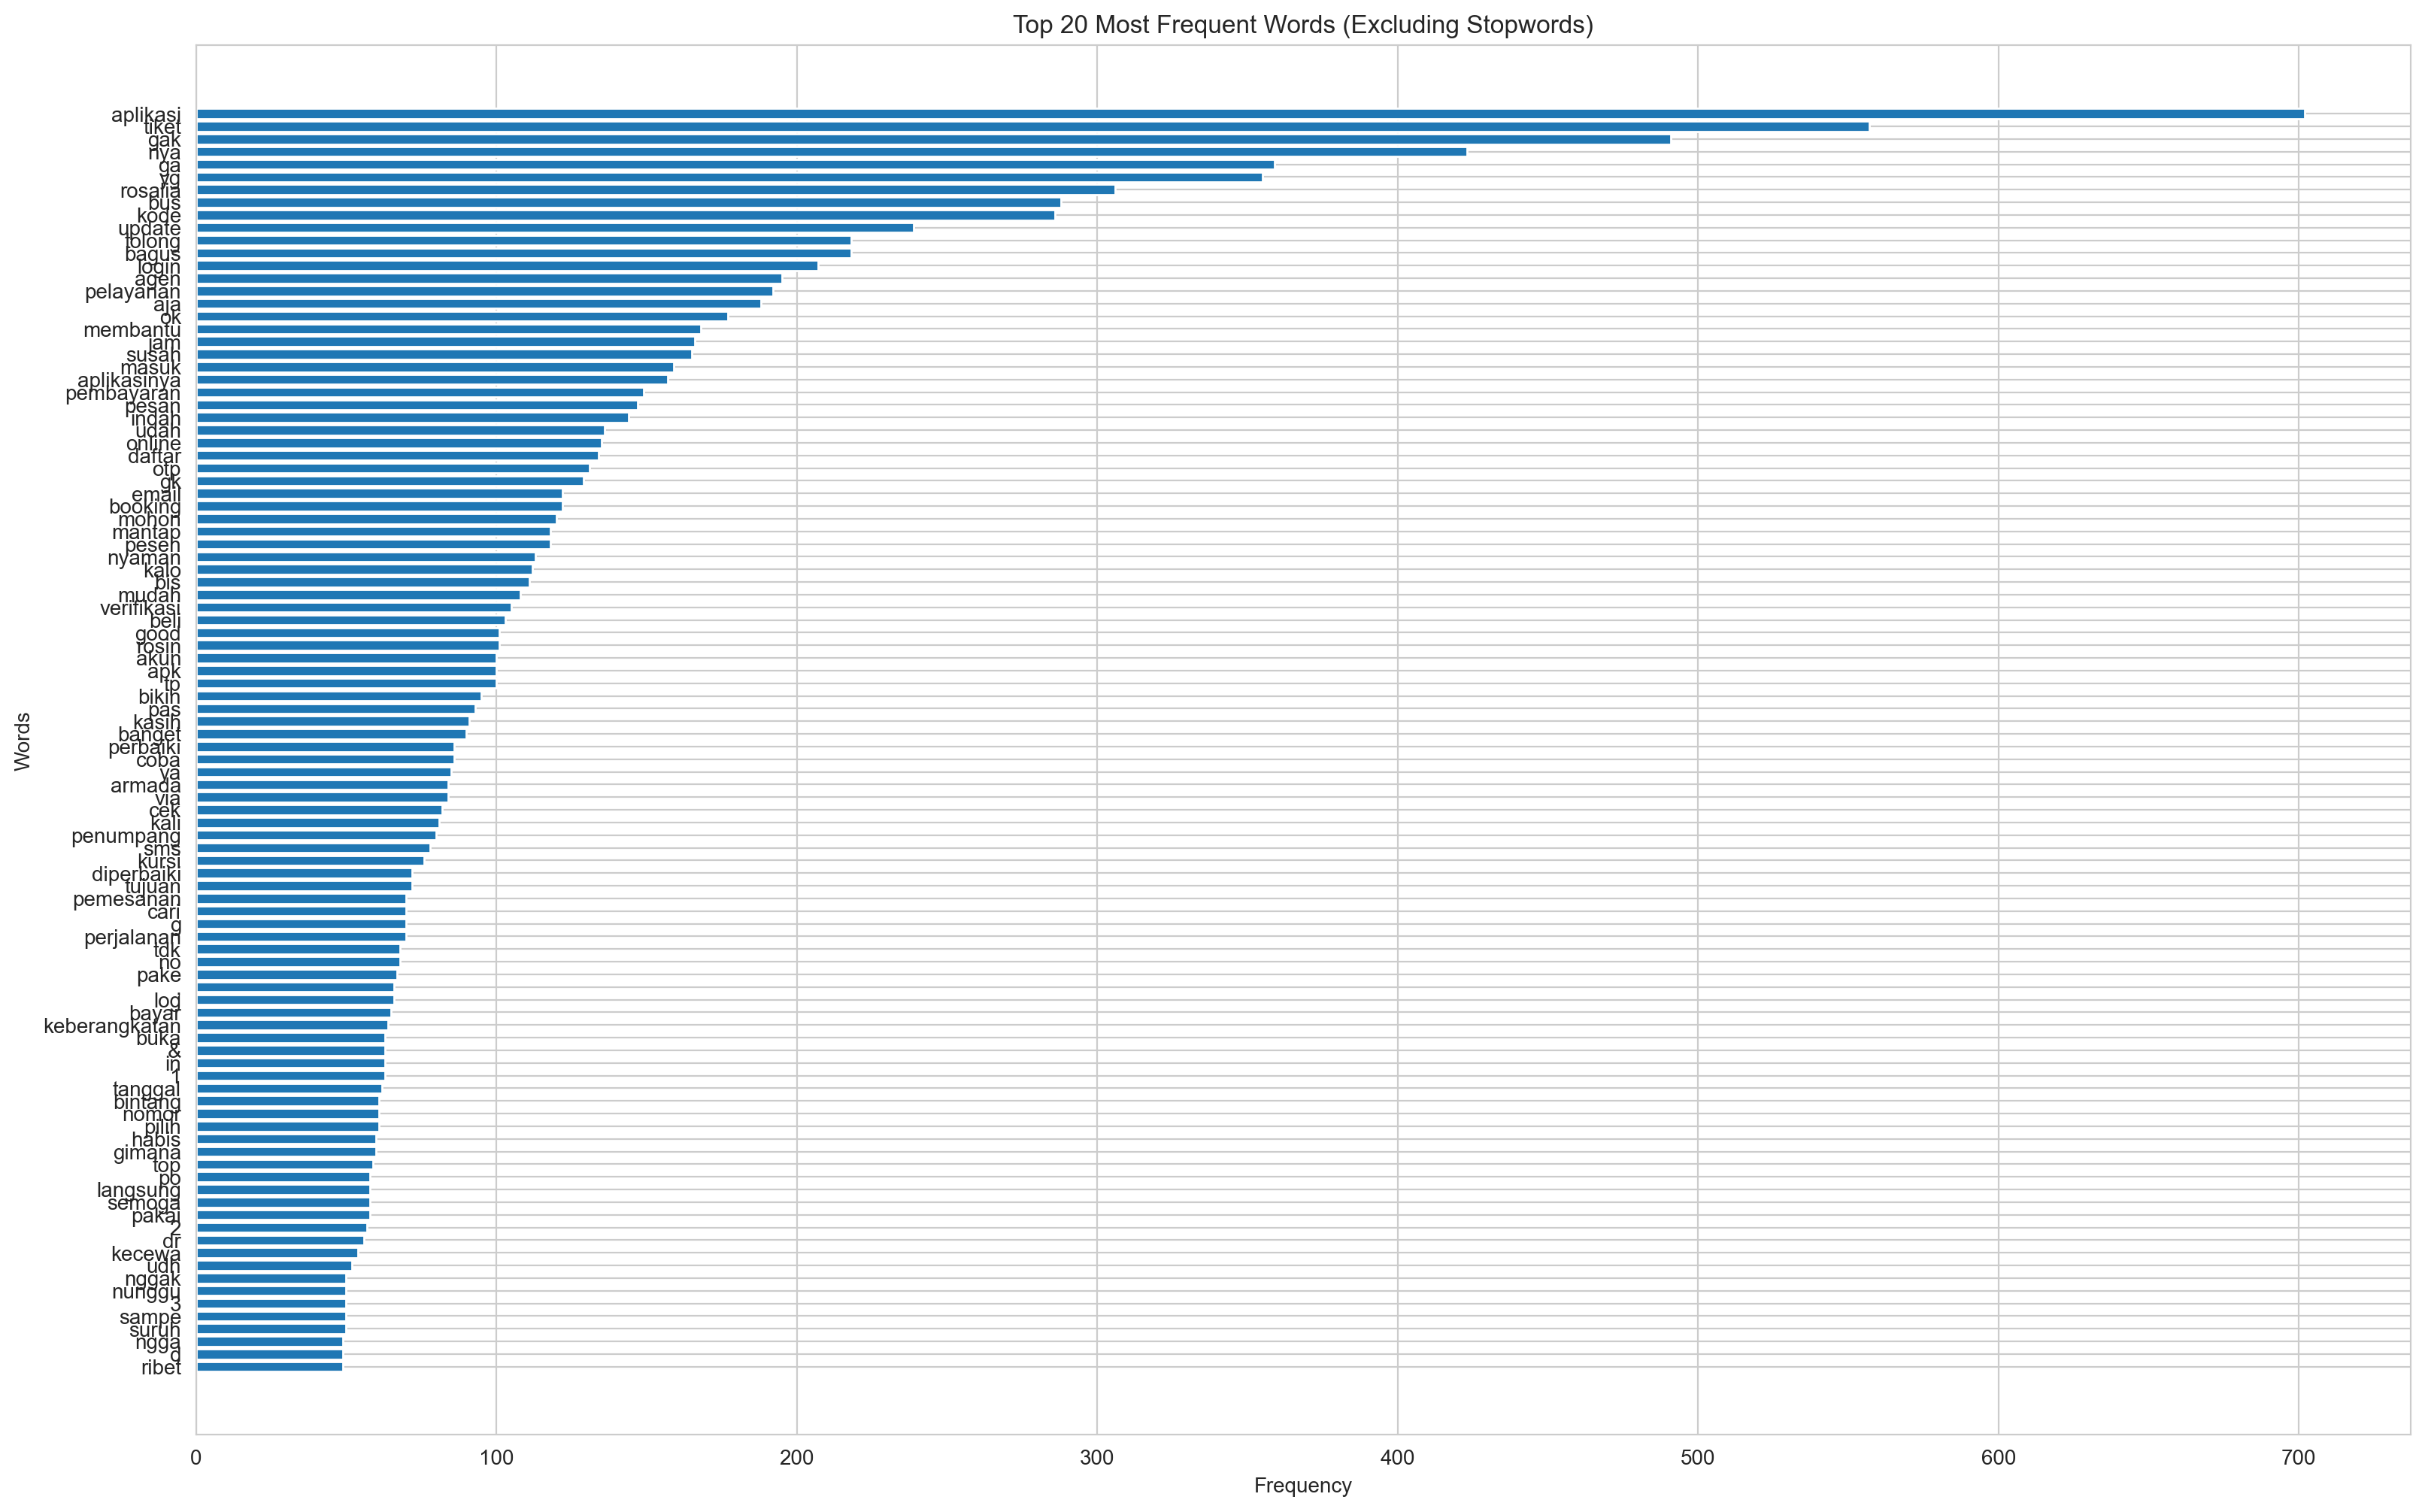

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_rosaliarev[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.show()

In [17]:
common_words

[('aplikasi', 702),
 ('tiket', 557),
 ('gak', 491),
 ('nya', 423),
 ('ga', 359),
 ('yg', 355),
 ('rosalia', 306),
 ('bus', 288),
 ('kode', 286),
 ('update', 239),
 ('tolong', 218),
 ('bagus', 218),
 ('login', 207),
 ('agen', 195),
 ('pelayanan', 192),
 ('aja', 188),
 ('ok', 177),
 ('membantu', 168),
 ('jam', 166),
 ('susah', 165),
 ('masuk', 159),
 ('aplikasinya', 157),
 ('pembayaran', 149),
 ('pesan', 147),
 ('indah', 144),
 ('udah', 136),
 ('online', 135),
 ('daftar', 134),
 ('otp', 131),
 ('gk', 129),
 ('email', 122),
 ('booking', 122),
 ('mohon', 120),
 ('mantap', 118),
 ('pesen', 118),
 ('nyaman', 113),
 ('kalo', 112),
 ('bis', 111),
 ('mudah', 108),
 ('verifikasi', 105),
 ('beli', 103),
 ('good', 101),
 ('rosin', 101),
 ('akun', 100),
 ('apk', 100),
 ('tp', 100),
 ('bikin', 95),
 ('pas', 93),
 ('kasih', 91),
 ('banget', 90),
 ('perbaiki', 86),
 ('coba', 86),
 ('ya', 85),
 ('armada', 84),
 ('via', 84),
 ('cek', 82),
 ('kali', 81),
 ('penumpang', 80),
 ('sms', 78),
 ('kursi', 76),
